In [103]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import pandas as pd
import os


np.random.seed(1981)
tf.random.set_seed(1981)

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
tf.__version__, keras.__version__

('2.0.0-alpha0', '2.2.4-tf')

#### Context
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

#### Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below. 

#### Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot 


Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)
Acknowledgements
Original dataset was downloaded from https://github.com/zalandoresearch/fashion-mnist

Dataset was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv/

#### License
The MIT License (MIT) Copyright © [2017] Zalando SE, https://tech.zalando.com
More: https://www.kaggle.com/zalando-research/fashionmnist

## Let's start by loading the fashion MNIST dataset. 
 The dataset is already split for you between a training set and a test set

In [51]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Here are the corresponding class names:

In [55]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Sample of the images in the dataset:

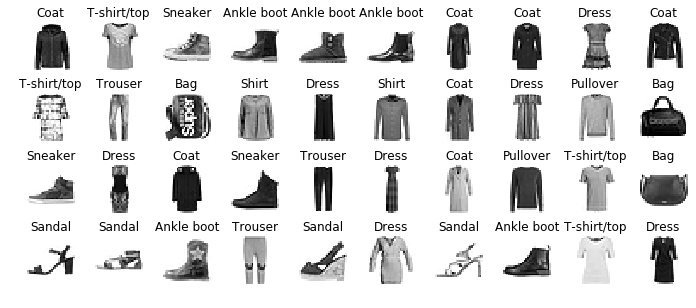

In [57]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_diagram', tight_layout=False)
plt.show()

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [58]:
X_valid.shape

(5000, 28, 28)

In [59]:
X_test.shape

(10000, 28, 28)

## Creating the model - Sequential API

In [169]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [170]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_46 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_47 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________


## Weights

In [171]:
weights

array([[ 0.00381066,  0.02374981,  0.02173891, ..., -0.01784476,
         0.0448908 ,  0.02098595],
       [-0.07055239,  0.00832503, -0.01834617, ...,  0.062205  ,
         0.06444171,  0.00160006],
       [ 0.06507286, -0.034734  , -0.06155635, ...,  0.06981781,
         0.03148483,  0.00652374],
       ...,
       [-0.01632177, -0.00588574, -0.00348891, ..., -0.04304202,
        -0.02525203,  0.00402389],
       [-0.05939206, -0.06770925, -0.01404384, ..., -0.01645248,
         0.00527916,  0.06193081],
       [-0.06971651, -0.07327126, -0.00812344, ..., -0.02872328,
         0.04537473,  0.01236328]], dtype=float32)

In [172]:
weights.shape

(784, 300)

## Biases

In [173]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [174]:
biases.shape

(300,)

## Model is created. We have to call it's compile()

In [175]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])

## Training and evaluating the model

In [177]:
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 3s 48us/sample - loss: 0.6666 - accuracy: 0.7689 - val_loss: 0.6350 - val_accuracy: 0.7864
Epoch 2/50
55000/55000 [==============================] - 3s 46us/sample - loss: 0.6318 - accuracy: 0.7820 - val_loss: 0.6062 - val_accuracy: 0.7964
Epoch 3/50
55000/55000 [==============================] - 3s 49us/sample - loss: 0.6042 - accuracy: 0.7910 - val_loss: 0.5807 - val_accuracy: 0.8036
Epoch 4/50
55000/55000 [==============================] - 3s 48us/sample - loss: 0.5815 - accuracy: 0.7989 - val_loss: 0.5622 - val_accuracy: 0.8096
Epoch 5/50
55000/55000 [==============================] - 3s 49us/sample - loss: 0.5630 - accuracy: 0.8047 - val_loss: 0.5459 - val_accuracy: 0.8170
Epoch 6/50
55000/55000 [==============================] - 3s 48us/sample - loss: 0.5481 - accuracy: 0.8109 - val_loss: 0.5294 - val_accuracy: 0.8204
Epoch 7/50
55000/55000 [==============================] -

In [179]:
history.params

{'batch_size': 32,
 'epochs': 50,
 'steps': None,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [180]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [181]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

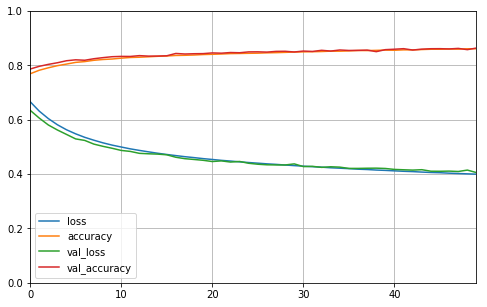

In [182]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

The neural network is trained. Training loss went down and teh accuracy reached %86 after 50 epoches.

In [197]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.4373 - accuracy: 0.8446


[0.4373161664009094, 0.8446]

# Save and load model and weights

In [198]:
model.save("Keras-Sequential-Fashion-MNIST.h5")

In [199]:
model = keras.models.load_model("Keras-Sequential-Fashion-MNIST.h5")

In [200]:
model.save_weights("Keras-Sequential-Fashion-MNIST_Weights.ckpt")

In [201]:
model.load_weights("Keras-Sequential-Fashion-MNIST_Weights.ckpt")

# Make prediction

In [202]:
X_new = X_test[:4]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.22, 0.  , 0.7 ],
       [0.  , 0.  , 0.97, 0.  , 0.01, 0.  , 0.03, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

We only care about the class with the highest estimated probability, we can use predict_classes() method:

In [203]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1, 1])

## Reading predicted classes

In [204]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser'], dtype='<U11')